In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

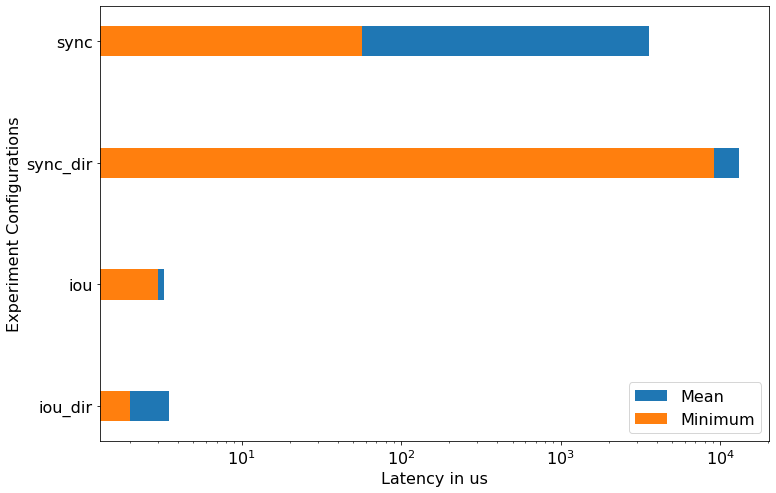

In [25]:
directory = "../report/"

# Initialize empty lists to store statistics
means = []
stds = []
mins = []
bar_labels = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('latency'):
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Calculate mean, standard deviation, and minimum of the column
        mean = df.mean().values[0]
        std = df.std().values[0]
        minimum = df.min().values[0]
        
        # Append the statistics to the respective lists
        means.append(mean)
        stds.append(std)
        mins.append(minimum)
        new_label = filename[:-4]
        new_label = new_label.replace("latency_", "")
        new_label = new_label.replace("io_uring", "iou")
        new_label = new_label.replace("direct", "dir")
        bar_labels.append(new_label)

# Plot the statistics as bar graphs
x = np.arange(len(bar_labels))  # X-axis positions
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.barh(x , means, width, label='Mean')
#rects2 = ax.barh(x, stds, width, label='Standard Deviation')
rects3 = ax.barh(x, mins, width, label='Minimum')

# Add labels to the bars
ax.set_yticks(x)
ax.set_yticklabels(bar_labels)
ax.legend(fontsize=16)

ax.set_xlabel('Latency in us', fontsize=16)
ax.set_ylabel('Experiment Configurations', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)


ax.set_xscale('log')
plt.savefig('../report/latency.png')
plt.show()


iops_io_uring.csv
iops_io_uring_random.csv
iops_io_uring_random_direct.csv
iops_io_uring_random_poll.csv
iops_sync.csv
iops_sync_random.csv
iops_sync_random_direct.csv


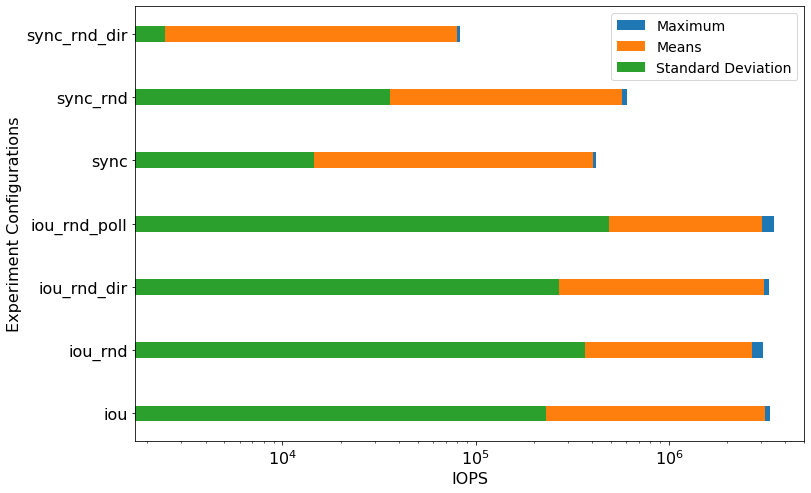

In [128]:
directory = "../report"
means = []
stds = []
maxs = []
bar_labels = []


# Loop through each file in the directory
for filename in sorted(os.listdir(directory)):
    if filename.endswith('.csv') and filename.startswith('iops'):
        print(filename)
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Calculate mean, standard deviation, and minimum of the column
        mean = df.mean().values[0]
        std = df.std().values[0]
        maximum = df.max().values[0]
        
        # Append the statistics to the respective lists
        means.append(mean)
        stds.append(std)
        maxs.append(maximum)
        new_label = filename[:-4]
        new_label = new_label.replace("iops_", "")
        new_label = new_label.replace("io_uring", "iou")
        new_label = new_label.replace("random", "rnd")
        new_label = new_label.replace("direct", "dir")
        bar_labels.append(new_label)

# Plot the statistics as bar graphs
x = np.arange(len(bar_labels))  # X-axis positions
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects3 = ax.barh(x , maxs, width, label='Maximum')
rects1 = ax.barh(x, means, width, label='Means')
rects2 = ax.barh(x, stds, width, label='Standard Deviation')

ax.set_yticks(x)
ax.set_yticklabels(bar_labels)
ax.legend(fontsize=14)

ax.set_xscale('log')
ax.set_xlabel('IOPS', fontsize=16)
ax.set_ylabel('Experiment Configurations', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

plt.savefig('../report/iops.png')
plt.show()

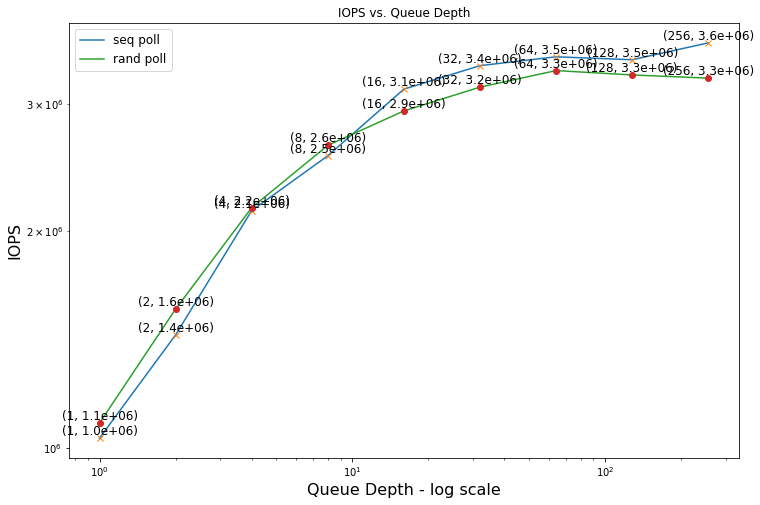

In [28]:
from matplotlib.ticker import ScalarFormatter

means = []
rnd_means = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('qd_'):
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Calculate mean, standard deviation, and minimum of the column
        mean = df.mean().values[0]

        new_label = filename[:-4]
        new_label = new_label.replace("qd_", "")
        if(new_label.startswith("rnd_")):
          new_label = new_label.replace("rnd_", "")
          qd = int(new_label)
          rnd_means.append((qd, mean))
        else:
          qd = int(new_label)
          # Append the statistics to the respective lists
          means.append((qd, mean))


#print(means)

# Sort the means by the parameter
means.sort(key=lambda x: x[0])
rnd_means.sort(key=lambda x: x[0])

# Extract the sorted parameters and means
parameters, means = zip(*means)
parameters, rnd_means = zip(*rnd_means)

plt.figure(figsize=(12, 8))

# Plot the means
plt.plot(parameters, means, label="seq poll")
plt.plot(parameters, means, 'x')
plt.plot(parameters, rnd_means, label='rand poll')
plt.plot(parameters, rnd_means, 'o')


plt.xlabel('Queue Depth - log scale', fontsize=16)
plt.ylabel('IOPS', fontsize=16)

plt.xscale('log')
plt.yscale('log')
plt.title('IOPS vs. Queue Depth')

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Set the formatter of the y-axis to use scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))
ax.yaxis.set_major_formatter(formatter)

# Add labels to the data points
for parameter, mean in zip(parameters, means):
    plt.text(parameter, mean, f"({parameter}, {mean:.1e})", ha='center', va='bottom', fontsize=12)

# Add labels to the data points
for parameter, mean in zip(parameters, rnd_means):
    plt.text(parameter, mean, f"({parameter}, {mean:.1e})", ha='center', va='bottom', fontsize=12)

plt.legend(fontsize=12)

plt.savefig('../report/queue_depth.png')
plt.show()

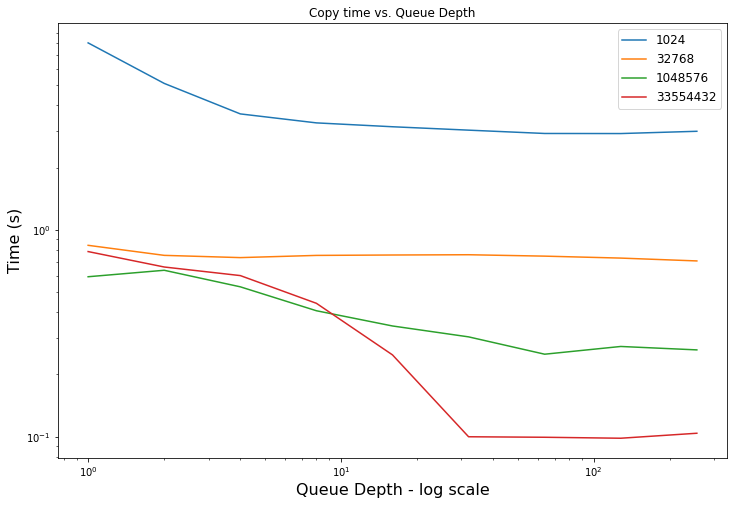

In [47]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(12, 8))

blk_sz = 1024
blk_sz_lmt = 1024 * 1024 * 32

while(blk_sz <= blk_sz_lmt):
    means = []
    # Loop through each file in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.csv') and filename.startswith('qducp_'):
            # Read the CSV file into a Pandas DataFrame
            df = pd.read_csv(os.path.join(directory, filename))
            
            # Calculate mean, standard deviation, and minimum of the column
            mean = df.mean().values
            print(filename, mean)

            new_label = filename[:-4]
            new_label = new_label.replace("qducp_", "")

            if(len(new_label.split('_')) == 1):
                continue

            qd = new_label.split('_')[0]
            qd = int(qd)
            bs = new_label.split('_')[1]
            bs = int(bs)
            if(bs != blk_sz):
                continue

            # Append the statistics to the respective lists
            means.append((qd, mean[0:3]))


    #print(means)
    if(len(means) == 0):
        blk_sz = blk_sz * 32
        continue

    print(blk_sz, means)
    # Sort the means by the parameter
    means.sort(key=lambda x: x[0])

    # Extract the sorted parameters and means
    parameters, means = zip(*means)


    # Plot the means
    #plt.plot(parameters, [row[0] for row in means], label="User time")
    #plt.plot(parameters, [row[1] for row in means], label="System time")
    plt.plot(parameters, [row[2] for row in means], label=bs)

    blk_sz = blk_sz * 32


plt.xlabel('Queue Depth - log scale', fontsize=16)
plt.ylabel('Time (s)', fontsize=16)

plt.xscale('log')
#plt.yscale('log')
plt.title('Copy time vs. Queue Depth')

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Set the formatter of the y-axis to use scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))
ax.yaxis.set_major_formatter(formatter)

# Add labels to the data points
#for parameter, mean in zip(parameters, means):
#    plt.text(parameter, mean, f"({parameter}, {mean:.1e})", ha='center', va='bottom', fontsize=12)


plt.legend(fontsize=12)

plt.savefig('../report/cp_qd.png')
plt.show()

(array([0.365   , 1.5225  , 1.895656]), array([0.0525    , 1.2925    , 1.35348225]), array([0.01    , 1.505   , 1.525191]), array([0.        , 1.67      , 1.67479975]))


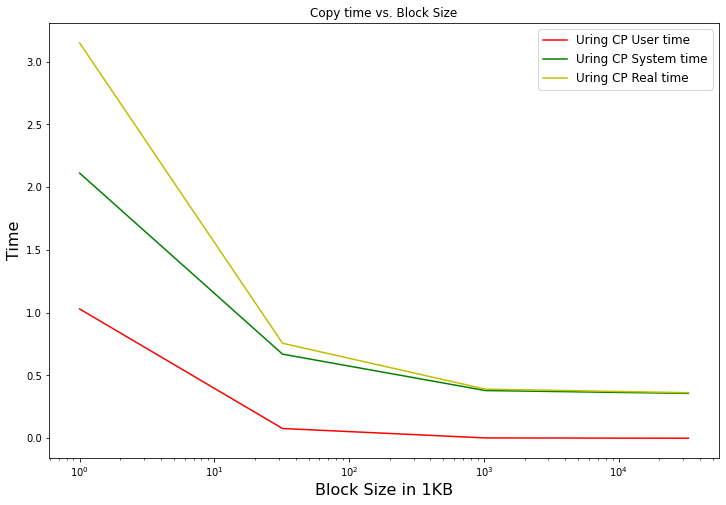

In [131]:
from matplotlib.ticker import ScalarFormatter
import os
rpt1 = "../report/bs_ucp/"
rpt2 = "../report/bs_cp/"

means = []
cpu_means = []

# Loop through each file in the directory
for filename in os.listdir(rpt1):
    if filename.endswith('.csv'):
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(os.path.join(rpt1, filename))
        
        # Calculate mean, standard deviation, and minimum of the column
        mean = df.mean().values

        new_label = filename[:-4]
        new_label = new_label.replace("bsucp_", "")
        qd = int(new_label)/1024
        # Append the statistics to the respective lists
        means.append((qd, mean[0:3]))


# Loop through each file in the directory
for filename in os.listdir(rpt2):
    if filename.endswith('.csv'):
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(os.path.join(rpt2, filename))
        
        # Calculate mean, standard deviation, and minimum of the column
        mean = df.mean().values

        new_label = filename[:-4]
        new_label = new_label.replace("bscp_", "")
        qd = int(new_label)/1024
        # Append the statistics to the respective lists
        cpu_means.append((qd, mean[0:3]))

#print(means)

# Sort the means by the parameter
means.sort(key=lambda x: x[0])
cpu_means.sort(key=lambda x: x[0])


# Extract the sorted parameters and means
parameters, means = zip(*means)
parameters, cpu_means = zip(*cpu_means)

plt.figure(figsize=(12, 8))

# Plot the means
plt.plot(parameters, [row[0] for row in means], label="Uring CP User time", color='r')
plt.plot(parameters, [row[1] for row in means], label="Uring CP System time", color='g')
plt.plot(parameters, [row[2] for row in means], label="Uring CP Real time", color='y')

print(cpu_means)
#plt.plot(parameters, [row[0] for row in cpu_means], label="Normal CP User time", color='b')
#plt.plot(parameters, [row[1] for row in cpu_means], label="Normal CP System time", color='purple')
#plt.plot(parameters, [row[2] for row in cpu_means], label="Normal CP Real time", color='orange')

plt.xlabel('Block Size in 1KB', fontsize=16)
plt.ylabel('Time', fontsize=16)

plt.xscale('log')
#plt.yscale('log')
plt.title('Copy time vs. Block Size')

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Set the formatter of the y-axis to use scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))
ax.yaxis.set_major_formatter(formatter)

# Add labels to the data points
#for parameter, mean in zip(parameters, means):
#    plt.text(parameter, mean, f"({parameter}, {mean:.1e})", ha='center', va='bottom', fontsize=12)


plt.legend(fontsize=12)

plt.savefig('../report/cp_bs.png')
plt.show()

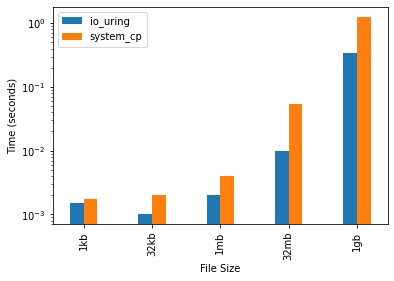

In [136]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("../report/compare_copy_times_edited.csv", index_col=None, header=0)
#print(df)
# Drop the first row (header)
df = df.iloc[1:]

# Convert the file size column to a categorical variable
df['file_size'] = pd.Categorical(df['file_size'], categories=df['file_size'].unique(), ordered=True)

# Convert the other columns to float data types
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)

# Group the DataFrame by file size and calculate the mean values for each group
means = df.groupby('file_size').mean()

# add two columns
means['io_uring'] = means['user_u'] + means['system_u']
means['system_cp'] = means['user_s'] + means['system_s']
means['percent'] = ( means['system_cp'] - means['io_uring'] ) * 100/means['system_cp']

means[['io_uring', 'system_cp']].plot(kind='bar', width=0.4)

# Set the x-axis and y-axis labels
plt.xlabel("File Size")
plt.ylabel("Time (seconds)")
plt.yscale("log")

# Add a legend to the plot
plt.legend()

plt.savefig("../report/cp_perf_compare.png")
# Show the plot
plt.show()

In [137]:
print(means)

           user_u  system_u   user_s  system_s  io_uring  system_cp    percent
file_size                                                                     
1kb        0.0015    0.0000  0.00125    0.0005    0.0015    0.00175  14.285714
32kb       0.0010    0.0000  0.00100    0.0010    0.0010    0.00200  50.000000
1mb        0.0016    0.0004  0.00140    0.0026    0.0020    0.00400  50.000000
32mb       0.0020    0.0080  0.00160    0.0518    0.0100    0.05340  81.273408
1gb        0.0018    0.3432  0.00800    1.2556    0.3450    1.26360  72.697056


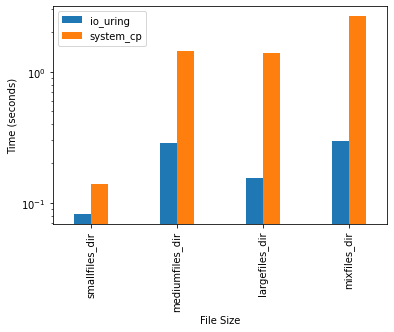

In [138]:

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("../report/compare_recursive_copy_times_edited.csv", index_col=None, header=0)
#print(df)
# Drop the first row (header)
df = df.iloc[1:]

# Convert the file size column to a categorical variable
df['file_size'] = pd.Categorical(df['file_size'], categories=df['file_size'].unique(), ordered=True)

# Convert the other columns to float data types
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)

# Group the DataFrame by file size and calculate the mean values for each group
means = df.groupby('file_size').mean()

# add two columns
means['io_uring'] = means['user_u'] + means['system_u']
means['system_cp'] = means['user_s'] + means['system_s']
means['percent'] = ( means['system_cp'] - means['io_uring'] ) * 100/means['system_cp']


means[['io_uring', 'system_cp']].plot(kind='bar', width=0.4)

# Set the x-axis and y-axis labels
plt.xlabel("File Size")
plt.ylabel("Time (seconds)")
plt.yscale("log")

# Add a legend to the plot
plt.legend()

plt.savefig("../report/cp_perf_recursive_compare.png", bbox_inches='tight')
# Show the plot
plt.show()

In [141]:
print(means)

                  user_u  system_u  user_s  system_s  io_uring  system_cp  \
file_size                                                                   
smallfiles_dir   0.01125   0.07125  0.0230    0.1160    0.0825     0.1390   
mediumfiles_dir  0.01880   0.26660  0.0394    1.3986    0.2854     1.4380   
largefiles_dir   0.00140   0.15260  0.0128    1.3774    0.1540     1.3902   
mixfiles_dir     0.00380   0.29140  0.0326    2.6320    0.2952     2.6646   

                   percent  
file_size                   
smallfiles_dir   40.647482  
mediumfiles_dir  80.152990  
largefiles_dir   88.922457  
mixfiles_dir     88.921414  
